We saw that GPR was not performing well with 2d dynamical systems. But how would it perform when we are just perfoming it on a 2 dimensional system.

Let us consider the same set of equations that were chosen as our dynamical system. But now let us just plot how the surface looks like.

$$ z_1 = x_2 - 0.5*x_1$$
$$ z_2 = sin(x_1)$$

Clearly the first equation represents a plane. Let us visualize it and see how GPR works on its prediction. Note that in the considered time period, $x_1$ varies from -2 to 4. And $x_2$ varies from 1 to 3.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.linspace(-2,4,100)
x2 = np.linspace(1,3,100)
x1,x2 = np.meshgrid(x1,x2)
z1 = x2 - 0.5*x1

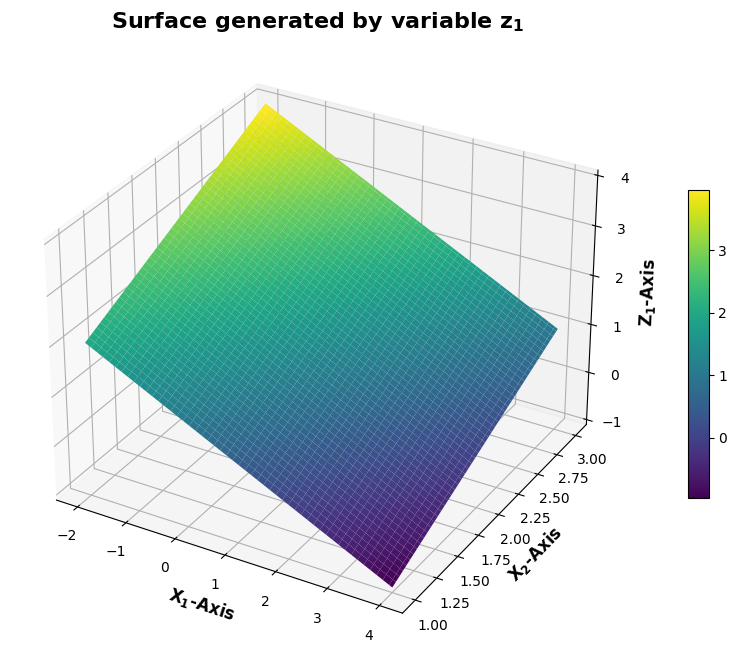

In [29]:
# Visualizing the surface created by z1

fig = plt.figure(figsize=(16,8))
axs = fig.add_subplot(111,projection="3d")

axs.set_title("Surface generated by variable $\mathbf{z_1}$", fontweight="bold", fontsize=16)
axs.set_xlabel("$\mathbf{X_1}$-Axis",fontweight="bold",fontsize=12)
axs.set_ylabel("$\mathbf{X_2}$-Axis", fontweight="bold", fontsize=12)
axs.set_zlabel("$\mathbf{Z_1}$-Axis", fontweight="bold", fontsize=12)

surf = axs.plot_surface(x1,x2,z1,cmap="viridis")


fig.colorbar(surf,shrink=0.5, aspect=15)

#### Generating data for performing GPR.
- Lets collect nx1 = 5 points along x1 axis and nx2 = 5 points along x2 axis. 
- They form the reqired data for the GPR.

In [33]:
nx1,nx2 = [1,10]

x1_data = np.linspace(-2,4,nx1)
x2_data = np.linspace(1,3,nx2)

x1_data,x2_data = np.meshgrid(x1_data,x2_data)

x1_data_flat = x1_data.flatten()
x2_data_flat = x2_data.flatten()

x_data = np.vstack((x1_data_flat,x2_data_flat))
x_data = np.transpose(x_data)

z_data = x_data[:,1]-0.5*x_data[:,0]
z_data = z_data.reshape(-1,1)

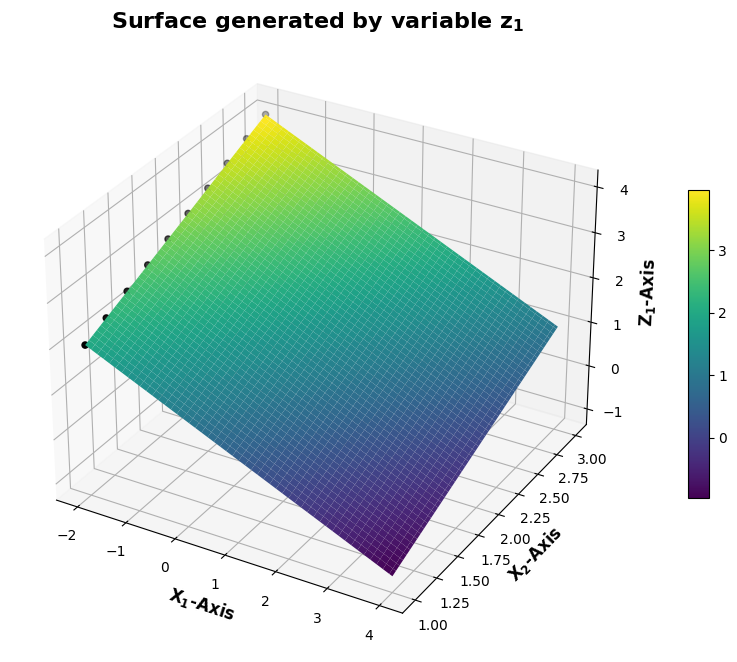

In [34]:
# Visualizing the surface created by z1

fig = plt.figure(figsize=(16,8))
axs = fig.add_subplot(111,projection="3d")

axs.set_title("Surface generated by variable $\mathbf{z_1}$", fontweight="bold", fontsize=16)
axs.set_xlabel("$\mathbf{X_1}$-Axis",fontweight="bold",fontsize=12)
axs.set_ylabel("$\mathbf{X_2}$-Axis", fontweight="bold", fontsize=12)
axs.set_zlabel("$\mathbf{Z_1}$-Axis", fontweight="bold", fontsize=12)

surf = axs.plot_surface(x1,x2,z1,cmap="viridis")
axs.scatter(x_data[:,0],x_data[:,1],z_data, c="k", marker = "o")

fig.colorbar(surf,shrink=0.5, aspect=15)

In [1]:
# Importing the GPR libraries.
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

ker_comp1 = 1 * RBF(length_scale=np.array([1.0,1.0]), length_scale_bounds=(1e-3, 1e3))
gpr_comp1 = GaussianProcessRegressor(kernel=ker_comp1, n_restarts_optimizer=9)
gpr_comp1.fit(x_data, z_data)
gpr_comp1.kernel_

ModuleNotFoundError: No module named 'sklearn.kernels'

In [36]:
# generating the test surface
x1_test = x1.flatten()
x2_test = x2.flatten()
x_test = np.vstack((x1_test,x2_test))
x_test = np.transpose(x_test)
z1_gpr = gpr_comp1.predict(x_test)
z1_gpr = z1_gpr.reshape(-1,1)

In [37]:
z1_gpr.shape

(10000, 1)

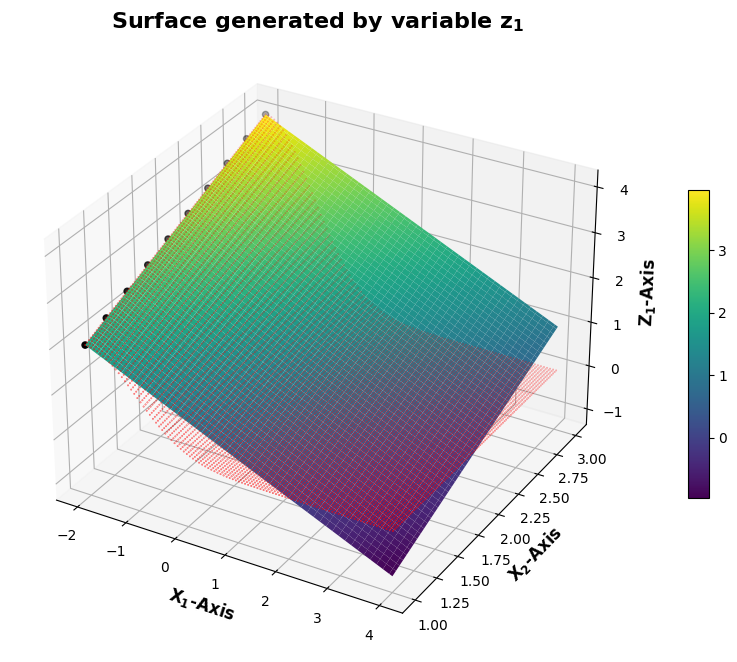

In [38]:
# Visualizing the surface created by z1

fig = plt.figure(figsize=(16,8))
axs = fig.add_subplot(111,projection="3d")

axs.set_title("Surface generated by variable $\mathbf{z_1}$", fontweight="bold", fontsize=16)
axs.set_xlabel("$\mathbf{X_1}$-Axis",fontweight="bold",fontsize=12)
axs.set_ylabel("$\mathbf{X_2}$-Axis", fontweight="bold", fontsize=12)
axs.set_zlabel("$\mathbf{Z_1}$-Axis", fontweight="bold", fontsize=12)

surf1 = axs.plot_surface(x1,x2,z1,cmap="viridis")
axs.scatter(x_data[:,0],x_data[:,1],z_data, c="k", marker = "o")

axs.scatter(x_test[:,0],x_test[:,1],z1_gpr,c="r", marker = "o", s = 0.1)

fig.colorbar(surf1,shrink=0.5, aspect=15)



NameError: name 'surf2' is not defined

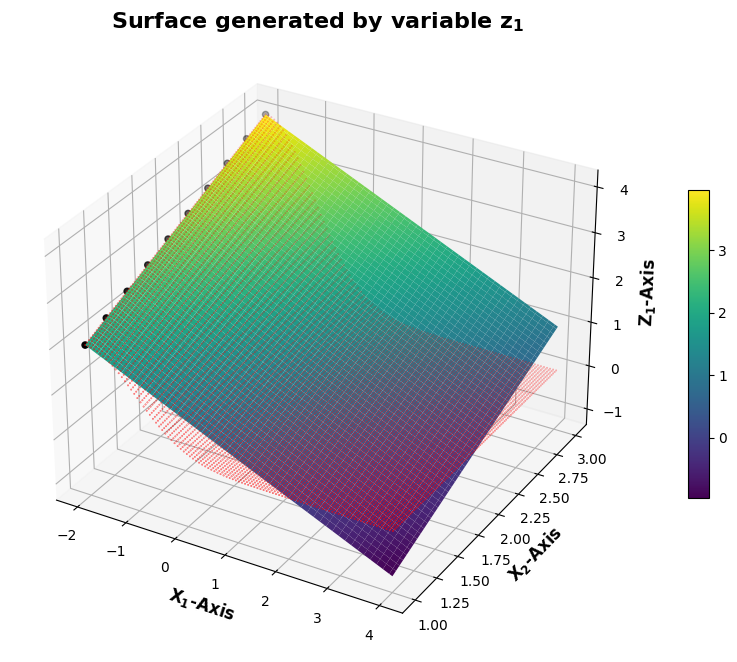

In [39]:
# Visualizing the surface created by z1

fig = plt.figure(figsize=(16,8))
axs = fig.add_subplot(111,projection="3d")

axs.set_title("Surface generated by variable $\mathbf{z_1}$", fontweight="bold", fontsize=16)
axs.set_xlabel("$\mathbf{X_1}$-Axis",fontweight="bold",fontsize=12)
axs.set_ylabel("$\mathbf{X_2}$-Axis", fontweight="bold", fontsize=12)
axs.set_zlabel("$\mathbf{Z_1}$-Axis", fontweight="bold", fontsize=12)

surf1 = axs.plot_surface(x1,x2,z1,cmap="viridis")
axs.scatter(x_data[:,0],x_data[:,1],z_data, c="k", marker = "o")

axs.scatter(x_test[:,0],x_test[:,1],z1_gpr,c="r", marker = "o", s = 0.1)

fig.colorbar(surf1,shrink=0.5, aspect=15)
fig.colorbar(surf2,shrink=0.5, aspect=15)
axs.view_init(elev=0, azim=90)


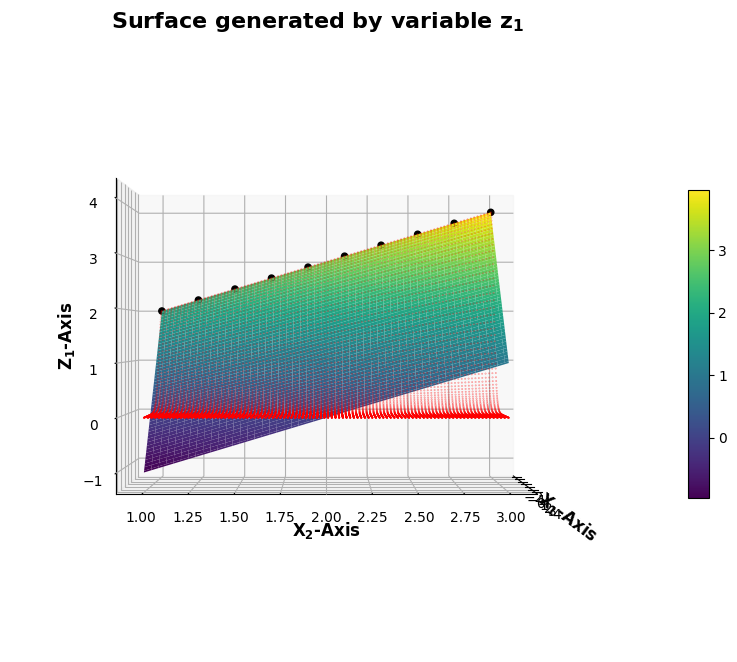

In [40]:
# Visualizing the surface created by z1

fig = plt.figure(figsize=(16,8))
axs = fig.add_subplot(111,projection="3d")

axs.set_title("Surface generated by variable $\mathbf{z_1}$", fontweight="bold", fontsize=16)
axs.set_xlabel("$\mathbf{X_1}$-Axis",fontweight="bold",fontsize=12)
axs.set_ylabel("$\mathbf{X_2}$-Axis", fontweight="bold", fontsize=12)
axs.set_zlabel("$\mathbf{Z_1}$-Axis", fontweight="bold", fontsize=12)

surf1 = axs.plot_surface(x1,x2,z1,cmap="viridis")
axs.scatter(x_data[:,0],x_data[:,1],z_data, c="k", marker = "o")

axs.scatter(x_test[:,0],x_test[:,1],z1_gpr,c="r", marker = "o", s = 0.1)

fig.colorbar(surf1,shrink=0.5, aspect=15)
axs.view_init(elev=0, azim=0)


In [12]:
x_data_dynamical_system = np.array([[-2.        ,  2.        ],
       [-1.2975397 ,  1.74643515],
       [-0.5959068 ,  1.47962751],
       [ 0.13919363,  1.37935397],
       [ 0.83443783,  1.64215918],
       [ 1.4479298 ,  2.07577574],
       [ 2.06535615,  2.49784019],
       [ 2.74553814,  2.80330468],
       [ 3.48483745,  2.80943912],
       [ 4.02494629,  2.31707963],
       [ 3.95986083,  1.59532137],
       [ 3.43130426,  1.08292454],
       [ 2.77547686,  1.22841451],
       [ 3.09365701,  1.81060611],
       [ 3.07090237,  1.5609153 ]])
z_data_dynamical_system = np.array([[ 3.        ],
       [ 2.395205  ],
       [ 1.77758091],
       [ 1.30975716],
       [ 1.22494027],
       [ 1.35181084],
       [ 1.46516211],
       [ 1.43053561],
       [ 1.0670204 ],
       [ 0.30460649],
       [-0.38460904],
       [-0.63272759],
       [-0.15932392],
       [ 0.26377761],
       [ 0.02546412]])

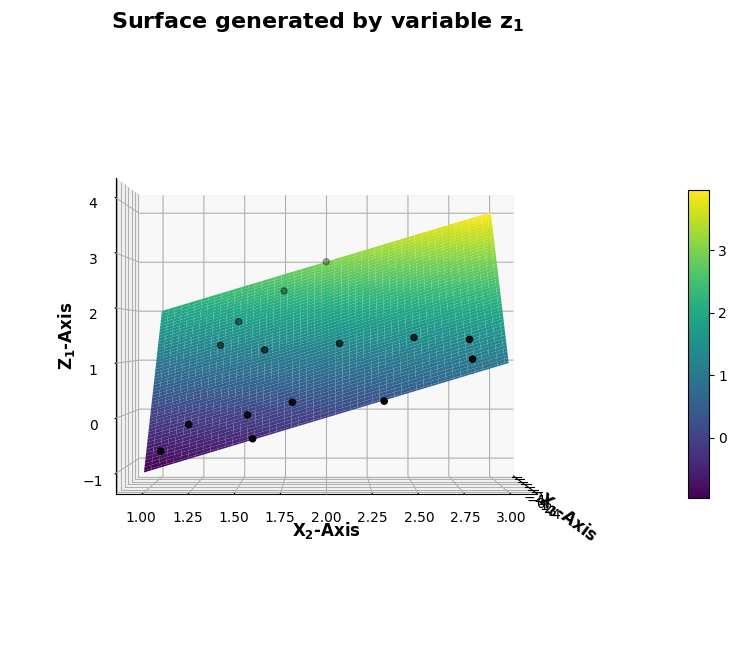

In [26]:
# Visualizing the surface created by z1

fig = plt.figure(figsize=(16,8))
axs = fig.add_subplot(111,projection="3d")

axs.set_title("Surface generated by variable $\mathbf{z_1}$", fontweight="bold", fontsize=16)
axs.set_xlabel("$\mathbf{X_1}$-Axis",fontweight="bold",fontsize=12)
axs.set_ylabel("$\mathbf{X_2}$-Axis", fontweight="bold", fontsize=12)
axs.set_zlabel("$\mathbf{Z_1}$-Axis", fontweight="bold", fontsize=12)

surf1 = axs.plot_surface(x1,x2,z1,cmap="viridis")
axs.scatter(x_data_dynamical_system[:,0],x_data_dynamical_system[:,1],z_data_dynamical_system, c="k", marker = "o")

#axs.scatter(x_test[:,0],x_test[:,1],z1_gpr_ds,c="r", marker = "o", s = 0.1)

fig.colorbar(surf1,shrink=0.5, aspect=15)

axs.view_init(elev=0, azim=0)


In [13]:
# Importing the GPR libraries.
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

ker_comp1_dS = 1 * RBF(length_scale=np.array([1.0,1.0]), length_scale_bounds=(1e-3, 1e3))
gpr_comp1_ds = GaussianProcessRegressor(kernel=ker_comp1_dS, n_restarts_optimizer=9)
gpr_comp1_ds.fit(x_data_dynamical_system, z_data_dynamical_system)
gpr_comp1_ds.kernel_

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 1000.0. Increas

316**2 * RBF(length_scale=[1e+03, 640])

In [14]:
# generating the test surface
z1_gpr_ds = gpr_comp1_ds.predict(x_test)
z1_gpr_ds = z1_gpr_ds.reshape(-1,1)

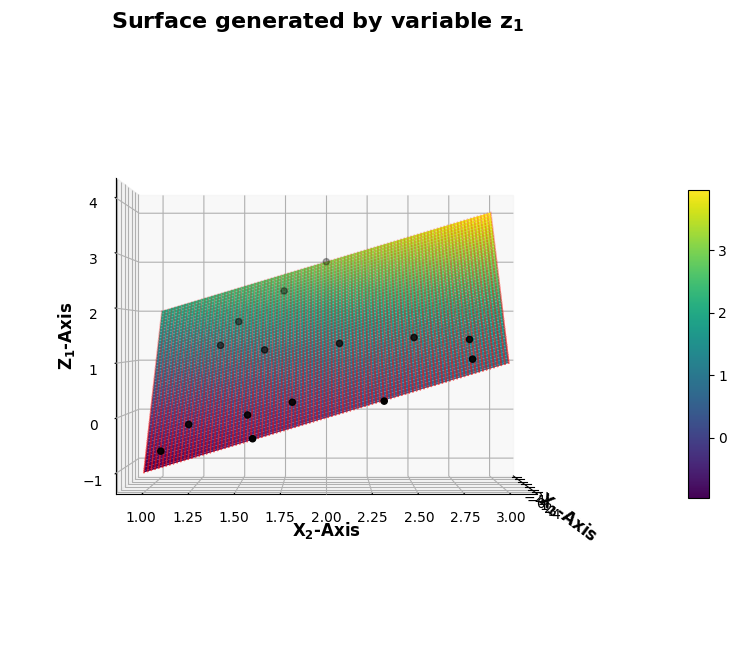

In [246]:
# Visualizing the surface created by z1

fig = plt.figure(figsize=(16,8))
axs = fig.add_subplot(111,projection="3d")

axs.set_title("Surface generated by variable $\mathbf{z_1}$", fontweight="bold", fontsize=16)
axs.set_xlabel("$\mathbf{X_1}$-Axis",fontweight="bold",fontsize=12)
axs.set_ylabel("$\mathbf{X_2}$-Axis", fontweight="bold", fontsize=12)
axs.set_zlabel("$\mathbf{Z_1}$-Axis", fontweight="bold", fontsize=12)

surf1 = axs.plot_surface(x1,x2,z1,cmap="viridis")
axs.scatter(x_data_dynamical_system[:,0],x_data_dynamical_system[:,1],z_data_dynamical_system, c="k", marker = "o")

axs.scatter(x_test[:,0],x_test[:,1],z1_gpr_ds,c="r", marker = "o", s = 0.1)

fig.colorbar(surf1,shrink=0.5, aspect=15)
fig.colorbar(surf2,shrink=0.5, aspect=15)
axs.view_init(elev=0, azim=0)


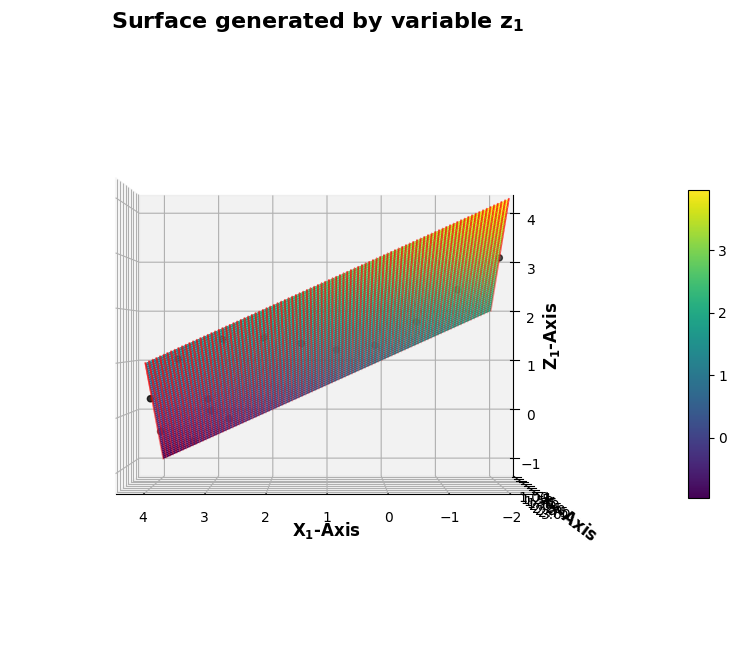

In [16]:
# Visualizing the surface created by z1

fig = plt.figure(figsize=(16,8))
axs = fig.add_subplot(111,projection="3d")

axs.set_title("Surface generated by variable $\mathbf{z_1}$", fontweight="bold", fontsize=16)
axs.set_xlabel("$\mathbf{X_1}$-Axis",fontweight="bold",fontsize=12)
axs.set_ylabel("$\mathbf{X_2}$-Axis", fontweight="bold", fontsize=12)
axs.set_zlabel("$\mathbf{Z_1}$-Axis", fontweight="bold", fontsize=12)

surf1 = axs.plot_surface(x1,x2,z1,cmap="viridis")
axs.scatter(x_data_dynamical_system[:,0],x_data_dynamical_system[:,1],z_data_dynamical_system, c="k", marker = "o")

axs.scatter(x_test[:,0],x_test[:,1],z1_gpr_ds,c="r", marker = "o", s = 0.1)

fig.colorbar(surf1,shrink=0.5, aspect=15)

axs.view_init(elev=0, azim=90)
